# Advertising Sales Channel Prediction

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The company has to select proper sales channel to predict the right sales channel to generate good revenue. 

In [1]:
#importing all the libraries we going to use in this program
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score

In [2]:
#loading the dataset
df=pd.read_csv('ADVERTISING SALE CHANNEL.csv')

In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
#EDA processing

In [5]:
#checking dimension
df.shape

(200, 5)

In [6]:
#checking type of all attributes
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [7]:
#statistical summary
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
#checking the null value in dataset
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

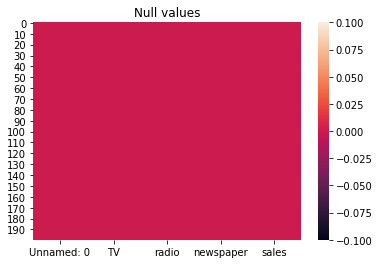

In [9]:
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

In [10]:
#Their are no null value in our dataset

<function matplotlib.pyplot.show(*args, **kw)>

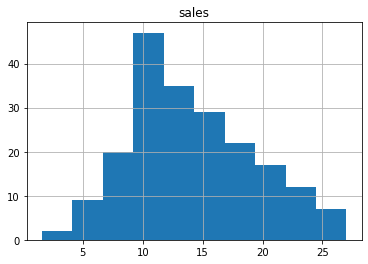

In [11]:
#histogram representation of no of country within a same happiness score 
df["sales"].hist(grid=True)
plt.title("sales")
plt.show

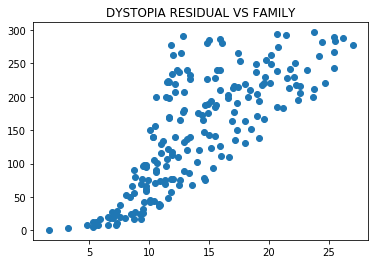

In [12]:
plt.scatter(df["sales"],df["TV"])
plt.title("DYSTOPIA RESIDUAL VS FAMILY")
plt.show()

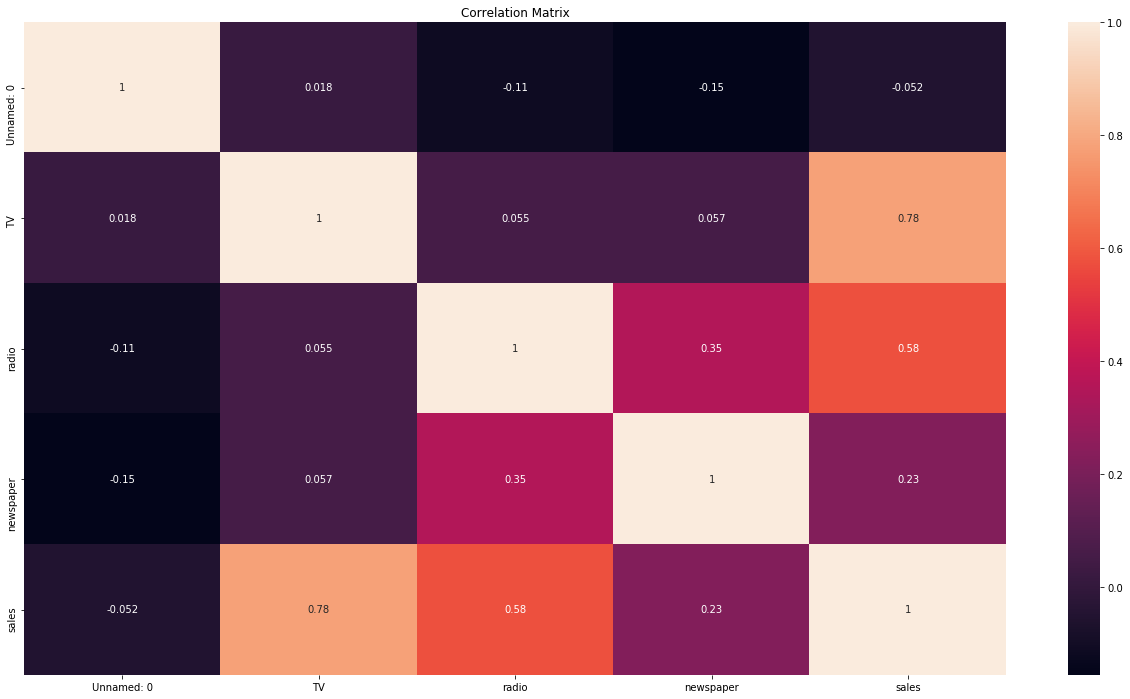

In [13]:
#CHECKING CORELATION
corr_mat=df.corr()
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [14]:
#splitting independent and target variable in x&y
x=df.drop(["sales","Unnamed: 0"],axis=1)
y=df[["sales"]]

In [15]:
#check the data distribution among all colunm
x.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
dtype: float64

In [16]:
from sklearn.preprocessing import power_transform
pt=power_transform(x, method='yeo-johnson')

In [17]:
df_new=pd.DataFrame(pt, columns=x.columns)

In [18]:
x=df_new
x.skew()

TV          -0.315199
radio       -0.242968
newspaper   -0.077942
dtype: float64

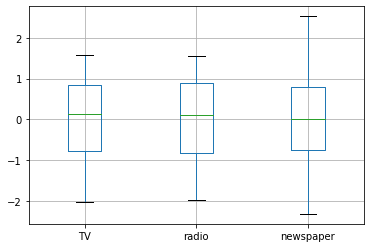

In [19]:
#checking outlier
x.boxplot()

In [20]:
#Creating train test split
from sklearn.model_selection import train_test_split

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [23]:
lr=LinearRegression()

In [24]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
y_pred=lr.predict(x_test)

In [26]:
y_test.head()

,sales
179,12.6
116,12.2
185,22.6
186,10.3
73,11.0


In [27]:
y_pred[0:5]

array([[12.73388113],
       [12.58826071],
       [20.36114079],
       [ 9.36910622],
       [10.11317802]])

In [28]:
#Evaluting the model
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 1.167057404282806
Mean Squared Error: 2.2490136319419296
Root Mean Squared Error: 1.4996711746052631


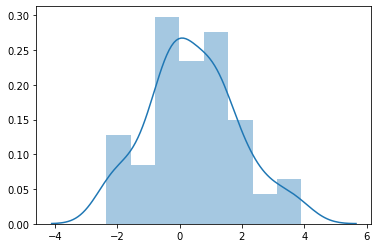

In [29]:
import seaborn as sns
sns.distplot(y_test-y_pred)

In [30]:
#Apply Ridge and Gridsearchcv to improve our model
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [31]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.01}
-2.740567664551524


In [33]:
import joblib
joblib.dump(ridge_regressor.best_estimator_,"advertising.pkl")

['advertising.pkl']